In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

df = pd.read_csv(r"C:\CDri_Programming\Project\Data\data.csv")
df

,num_reward,min_price,target,cnt_main_images,cnt_title_images,start_date,end_date,category,succ_rate,code,result,success,cnt_sell
0,3,11900,500000,5,2,2022-04-20,2022-04-29,푸드,1.000000,145312,435,1,42.016807
1,6,35900,500000,7,3,2022-04-15,2022-05-09,푸드,1.000000,145276,395,1,13.927577
2,2,22000,500000,31,4,2022-04-19,2022-04-25,푸드,0.975610,145132,442,1,22.727273
3,3,5000,500000,16,1,2022-04-17,2022-04-25,게임·취미,1.000000,145082,278,1,100.000000
4,2,98000,500000,12,1,2022-04-18,2022-05-13,스포츠·모빌리티,0.000000,145037,0,0,5.102041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9915,9,65900,500000,92,4,2021-11-05,2021-11-22,홈·리빙,0.807692,130228,1238,1,0.000182
9916,3,29900,3000000,93,1,2022-04-11,2022-05-16,스포츠·모빌리티,1.000000,130227,424,1,100.334448
9917,8,75000,500000,40,7,2021-11-22,2021-12-03,홈·리빙,0.916667,130225,853,1,6.666667
9918,5,22500,2000000,8,1,2022-01-16,2022-01-24,패션·잡화,0.000000,130224,47,0,88.888889


In [20]:
dummy = df.loc[df.loc[:,"target"]==500000, :]
dummy

,num_reward,min_price,target,cnt_main_images,cnt_title_images,start_date,end_date,category,succ_rate,code,result,success,cnt_sell
0,3,11900,500000,5,2,2022-04-20,2022-04-29,푸드,1.000000,145312,435,1,42.016807
1,6,35900,500000,7,3,2022-04-15,2022-05-09,푸드,1.000000,145276,395,1,13.927577
2,2,22000,500000,31,4,2022-04-19,2022-04-25,푸드,0.975610,145132,442,1,22.727273
3,3,5000,500000,16,1,2022-04-17,2022-04-25,게임·취미,1.000000,145082,278,1,100.000000
4,2,98000,500000,12,1,2022-04-18,2022-05-13,스포츠·모빌리티,0.000000,145037,0,0,5.102041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,6,23000,500000,102,1,2021-12-10,2021-12-24,홈·리빙,1.000000,130245,372,1,21.739130
9913,10,17300,500000,82,3,2021-11-16,2021-12-07,뷰티,1.000000,130241,4670,1,0.008555
9914,5,15000,500000,36,1,2022-03-07,2022-03-28,홈·리빙,1.000000,130238,306,1,33.333333
9915,9,65900,500000,92,4,2021-11-05,2021-11-22,홈·리빙,0.807692,130228,1238,1,0.000182


In [21]:
df.loc[:,"end_date"] = pd.to_datetime(df.loc[:,"end_date"], format='%Y-%m-%d')
df.loc[:,"start_date"] = pd.to_datetime(df.loc[:,"start_date"], format='%Y-%m-%d')

df.loc[:,"duration"] = df.loc[:,"end_date"]-df.loc[:,"start_date"]
df.duration

0       9 days
1      24 days
2       6 days
3       8 days
4      25 days
         ...  
9915   17 days
9916   35 days
9917   11 days
9918    8 days
9919   25 days
Name: duration, Length: 9920, dtype: timedelta64[ns]

In [22]:
df.duration = df.duration.dt.days
df.duration

0        9
1       24
2        6
3        8
4       25
        ..
9915    17
9916    35
9917    11
9918     8
9919    25
Name: duration, Length: 9920, dtype: int64

In [23]:
cov_col = [
    'num_reward', 
    'min_price', 
    'target', 
    'cnt_main_images',
    'cnt_title_images', 
    'duration',
    'category',
    'result', 
    'success'
    ]

df_cov = df[cov_col]

In [24]:
df_cov.dtypes

num_reward           int64
min_price            int64
target               int64
cnt_main_images      int64
cnt_title_images     int64
duration             int64
category            object
result               int64
success              int64
dtype: object

In [25]:
from sklearn.preprocessing import MinMaxScaler
cols = ['min_price', 'target']
Scaler = MinMaxScaler()
df_cov.loc[:,cols] = Scaler.fit_transform(df_cov.loc[:,cols])
df_cov

C:\Users\qkfxh\AppData\Local\Temp\ipykernel_10112\3779819755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cov.loc[:,cols] = Scaler.fit_transform(df_cov.loc[:,cols])


,num_reward,min_price,target,cnt_main_images,cnt_title_images,duration,category,result,success
0,3,0.002180,0.000000,5,2,9,푸드,435,1
1,6,0.006981,0.000000,7,3,24,푸드,395,1
2,2,0.004201,0.000000,31,4,6,푸드,442,1
3,3,0.000800,0.000000,16,1,8,게임·취미,278,1
4,2,0.019404,0.000000,12,1,25,스포츠·모빌리티,0,0
...,...,...,...,...,...,...,...,...,...
9915,9,0.012983,0.000000,92,4,17,홈·리빙,1238,1
9916,3,0.005781,0.002501,93,1,35,스포츠·모빌리티,424,1
9917,8,0.014803,0.000000,40,7,11,홈·리빙,853,1
9918,5,0.004301,0.001501,8,1,8,패션·잡화,47,0


In [26]:
sucByCat = df_cov.groupby("category")["success"].value_counts().unstack()
sucByCat.columns
total_suc = sucByCat[1].sum()
total_fail = sucByCat[0].sum()
sucByCat['fail_rate'] = sucByCat[0]/total_fail
sucByCat['suc_rate'] = sucByCat[1]/total_suc
sucByCat

success,0,1,fail_rate,suc_rate
category,,,,
게임·취미,29,141,0.023967,0.016188
모임,1,2,0.000826,0.000230
반려동물,77,339,0.063636,0.038921
베이비·키즈,14,106,0.011570,0.012170
뷰티,64,1007,0.052893,0.115614
소셜·캠페인,30,112,0.024793,0.012859
스포츠·모빌리티,34,391,0.028099,0.044891
여행·레저,73,386,0.060331,0.044317
출판,29,109,0.023967,0.012514


Text(0.5, 1.0, '실패,성공 비율 비교')

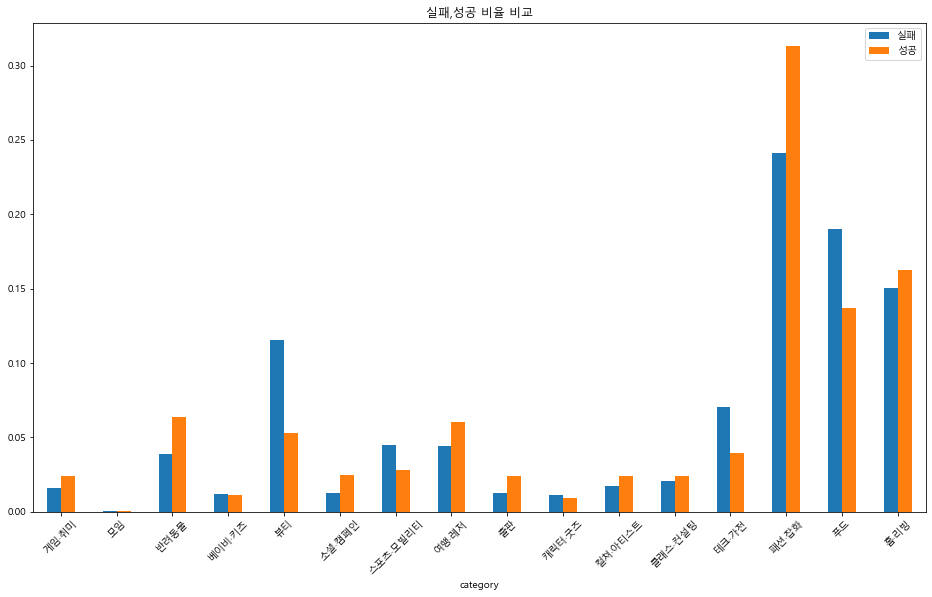

In [27]:
fig, ax = plt.subplots()
sucByCat[['suc_rate', 'fail_rate']].plot.bar(figsize=(16,9), rot = 45, ax=ax)
ax.legend(["실패", "성공"])
ax.set_title("실패,성공 비율 비교")

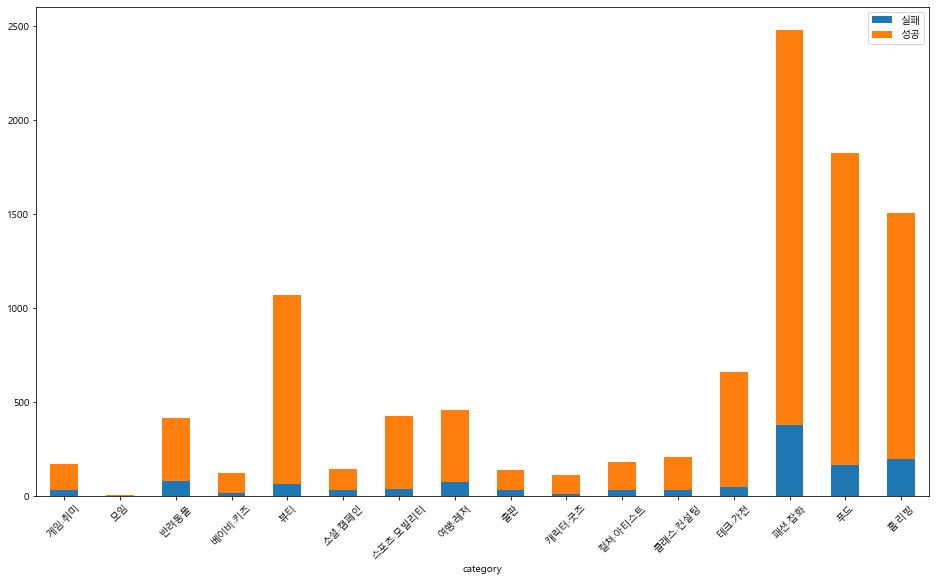

In [28]:
sucByCat = df_cov.groupby("category")["success"].value_counts().unstack()
fig, ax = plt.subplots()
sucByCat.plot.bar(figsize=(16,9), rot = 45, ax=ax, stacked=True)
ax.legend(["실패", "성공"])

In [29]:
df.loc[(df["target"]!=500000), "target"].value_counts()

1000000     2675
2000000      286
3000000      259
5000000      252
1500000      105
            ... 
7100000        1
4350000        1
33000000       1
11250000       1
3950000        1
Name: target, Length: 158, dtype: int64

In [48]:
crit = [
    0,
    500000,
    1000000,
    5000000,
    10000000
    ]

for i in range(len(crit)-1):
    df.loc[((df["target"] <= crit[i+1]) & (df["target"] > crit[i])), "target_rank"] = i

df["target_rank"].value_counts()

0.0    5780
1.0    2810
2.0    1072
3.0     146
Name: target_rank, dtype: int64

In [77]:
tarByNum = df.groupby("num_reward")["target_rank"].value_counts().unstack()
tarByNum = tarByNum.fillna(0)
tarByNum = tarByNum.loc[(tarByNum.index<=20), :]

In [79]:
fig, ax = plt.subplots(figsize=(24,9),dpi=1000)
# fig.figure(figsize=[32,9])
sns.distplot(tarByNum[0] , color="dodgerblue", ax=ax, axlabel="카운트 수")
sns.distplot(tarByNum[1] , color="red", ax=ax)
sns.distplot(tarByNum[2] , color="green", ax=ax)
# sns.distplot(tarByNum[3] , color="orange", ax=ax, axlabel='목표금액')

C:\Users\qkfxh\Anaconda3\envs\PyTorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\qkfxh\Anaconda3\envs\PyTorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\qkfxh\Anaconda3\envs\PyTorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

<AxesSubplot:xlabel='2.0', ylabel='Density'>

In [ ]:
# # pd.get_dummies(data=df_cov, columns=['category'], prefix="") #원핫
# from sklearn.preprocessing import LabelEncoder

# Enc = LabelEncoder()
# df_cov["category"] = Enc.fit_transform(df_cov['category'])
# print(Enc.classes_)

In [ ]:
# mat = np.asarray(df_cov)
# covMatrix = np.cov(mat, bias=True)
# print(covMatrix)

In [ ]:
# sn.heatmap(covMatrix, annot=True, fmt='g')
# plt.show()

In [4]:
df = pd.read_csv(r"C:\CDri_Programming\Project\Data\clustering.csv", encoding="cp949")
df

,label,category,sub_category,code,success
0,0,푸드,화장품,145312,1
1,0,푸드,침구류/커튼,145276,1
2,0,푸드,의류,145132,1
3,0,게임·취미,의류,145082,1
4,3,스포츠·모빌리티,"패션잡화 (모자,벨트,액세서리)",145037,0
...,...,...,...,...,...
9484,1,출판,기타 재화,131489,1
9485,0,푸드,침구류/커튼,131487,1
9486,1,푸드,"소형전자(MP3,전자사전 등)",131486,1
9487,5,홈·리빙,기타 재화,131485,1


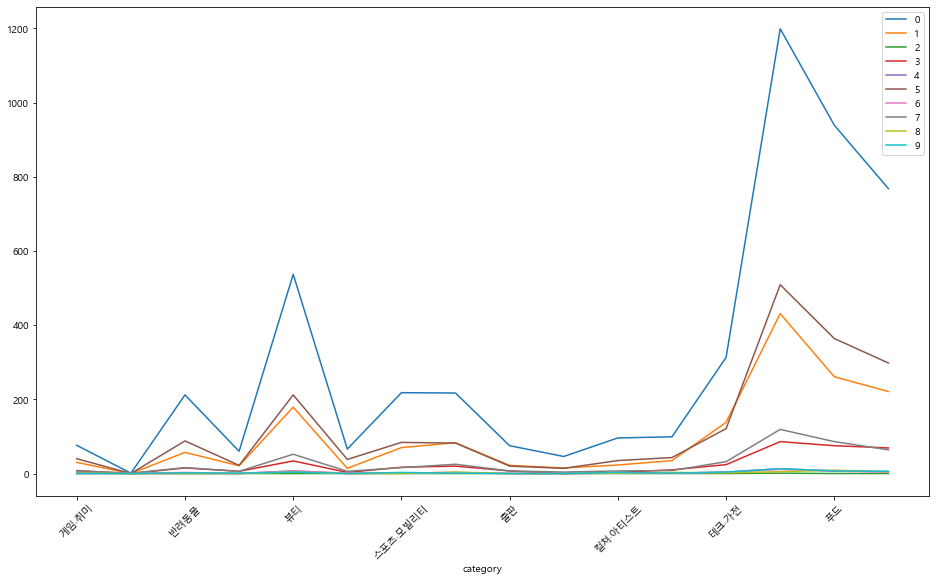

In [27]:
def plot_by(by, plot):
    temp = df.groupby(by)[plot]
    temp =  temp.value_counts().unstack().fillna(0)

    fig, ax = plt.subplots()
    for idx in range(len(temp)):
        temp.loc[idx].plot(ax=ax, rot = 45, figsize=(16,9))
        ax.legend()
        
plot_by(by="label", plot="category")

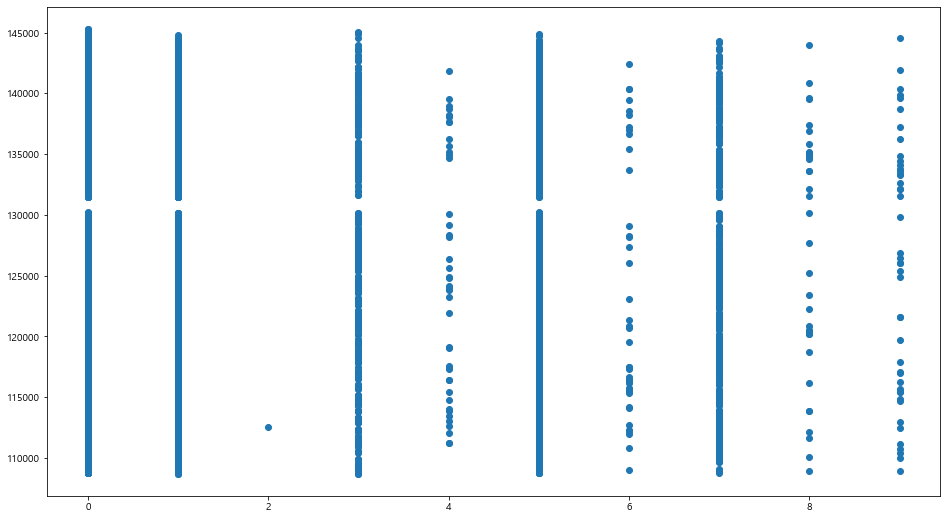

In [32]:
plt.figure(figsize=(16,9))
plt.scatter(x=df["label"], y=df["code"])
plt.show()

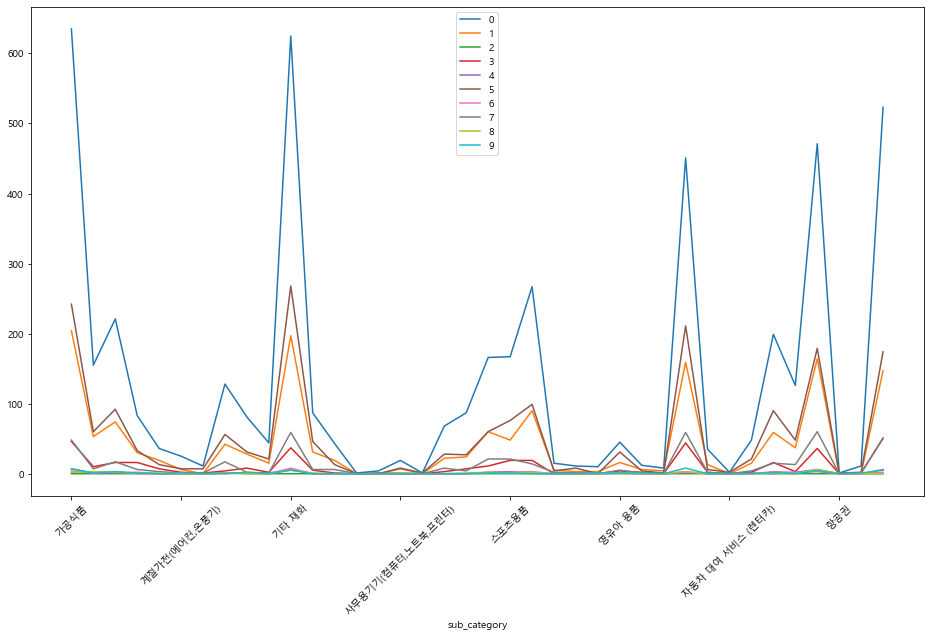

In [33]:
plot_by("label",plot="sub_category")

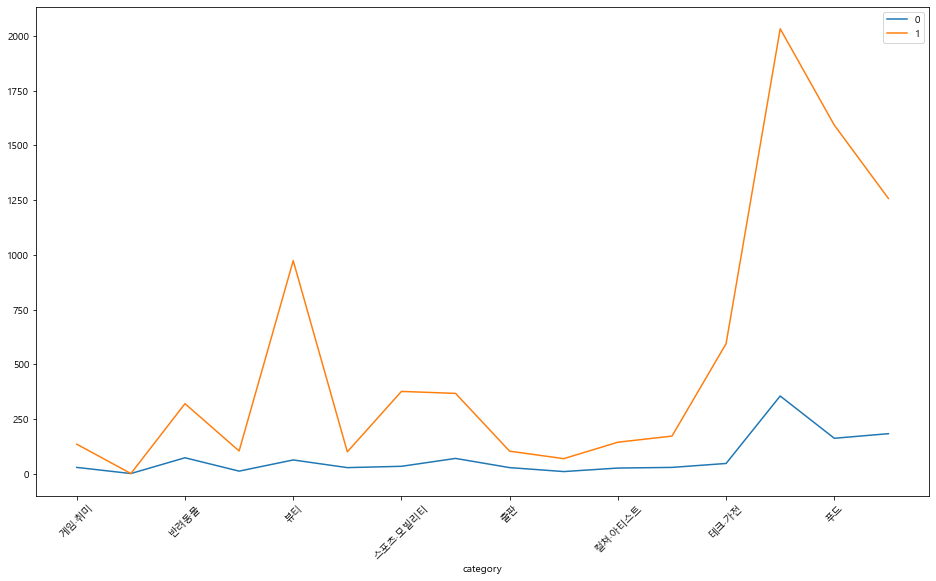

In [36]:
plot_by(by="success", plot="category")

clustering 은 분류가 잘 됐는지 보는 방법이 표로 보는 것보다 새로운 데이터가 들어왔을 때 어떻게 분류하느냐가 성능의 지표이지 않을까
<br>
해서 우리가 이 값들을 가지고 새로운 값으로서 넣으면 되겠다 싶은 대표 값들 몇개를 정하고
<br>
이걸 가지고 대략 어떻게 뜨는지를 확인하면 되지 않을까
<br>
사용자에게 보여줄 데이터는 같은 군집에 속하는 애들 중 달성 금액이 제일 높은 상위 3개나 
<br>
혹은 가장 가까운 데이터 3개를 뽑아오면 좋을 거 같은데
<br>
근데 클러스터링이 보통 계산된 거리까지 함께 저장을 하나?
<br>
그냥 계산하고 끝 아닌가?
<br>


In [35]:
df.sub_category.unique()

array(['화장품', '침구류/커튼', '의류', '패션잡화 (모자,벨트,액세서리)', '기타 재화', '스포츠용품', '서적',
       '의료기기', '가방', '소형전자(MP3,전자사전 등)', '가공식품', '귀금속/보석/시계류',
       '식품(농수축산물)', '건강 기능 식품', '주방용품', '구두/신발', '광학기기(디지털카메라,캠코더)',
       '자동차용품 (자동차부품,기타 자동차용품)', '호텔/펜션 예약', '가구(침대,소파,싱크대,DIY제품)',
       '디지털 콘텐츠(음원, 게임, 인터넷강의 등)', '영상가전(TV류)',
       '가정용 전기제품(냉장고,세탁기,식기세척기,전자레인지)', '영화?공연', '생활화학제품', '악기',
       '사무용기기(컴퓨터,노트북,프린터)', '기타 용역', '영유아 용품', '의약외품', '계절가전(에어컨,온풍기)',
       '모바일 쿠폰', '여행패키지', '자동차 대여 서비스 (렌터카)',
       '물품대여 서비스 (정수기, 비데, 공기청정기 등)', '살생물제품',
       '물품대여서비스 (서적, 유아용품, 행사용품 등)', '항공권'], dtype=object)

In [ ]:
import pandas as pd

dum = pd.DataFrame(columns=[0]*3+[1]*3)

arr = []
for i in range(18):
    arr.append(1)
    if len(arr)%6==0:
        dum.loc[len(dum)] = arr
        arr.clear()
        
dum2 = pd.DataFrame(columns=[2]*3 + [0]*3)

arr = []
for i in range(18,36):
    arr.append(i)
    if len(arr)%6==0:
        dum2.loc[len(dum2)] = arr
        arr.clear()

dum2[0] = dum[0].mul(1+(dum2[0]/100))
print(dum2)